# Лабораторная работа №12
## Вариант 7

In [101]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Задание 1

 x[0]          x[1]        y
[[-0.02527102  0.37346134  1.        ]
 [-2.23344265 -0.62393147  1.        ]
 [-1.71369415  1.27013204  1.        ]
 [-0.39992151 -1.64904268  1.        ]
 [ 2.33818754 -0.87516635  0.        ]]


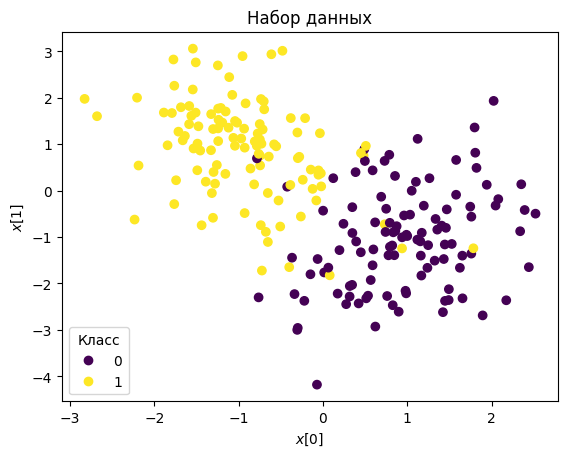

In [2]:
x, y = make_classification(n_samples=220, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=1, random_state=7)
scatter = plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('$x[0]$')
plt.ylabel('$x[1]$')
plt.legend(*scatter.legend_elements(), title='Класс')
plt.title('Набор данных')
print(" x[0]          x[1]        y")
print(np.array([(x[i, 0], x[i, 1], y[i]) for i in range(len(y))])[:5])

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

clf = RidgeClassifier()
clf.fit(x_train, y_train)
clf.coef_

array([[-0.51542382,  0.21930773]])

[0.036788918677773744, -0.5154238214092279, 0.2193077327540499]


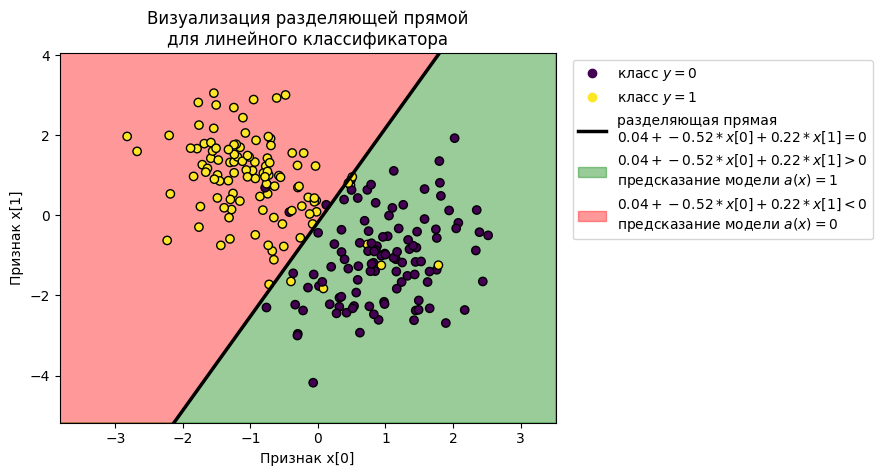

In [4]:
w = list(clf.intercept_) + list(clf.coef_[0])
print(w)
x0_min, x0_max = x[:,0].min()-1, x[:,0].max()+1
x1_min, x1_max = x[:,1].min()-1, x[:,1].max()+1
# разделяющая прямая
x_line = np.array([x0_min, x0_max])
y_line = -(w[0] + w[1] * x_line) / w[2]
line = plt.axline(*zip(x_line,y_line), linewidth=2.5, color='k')
# области по разные стороны от разделяющей прямой
area_1 = plt.fill_between(x_line, y_line, np.full(2, x1_min), color='green', alpha=0.4)
area_2 = plt.fill_between(x_line, np.full(2, x1_max), y_line, color='red', alpha=0.4)
# объекты из набора данных
scatter = plt.scatter(x[:,0], x[:,1], c=y, edgecolor='k')
# оформление: легенда и названия
handles = scatter.legend_elements()[0]+[line, area_1, area_2]
eq = f'{w[0]:.02f} + {w[1]:.02f} * x[0] + {w[2]:.02f} * x[1]'
labels = ([f'класс $y=${i}' for i in scatter.legend_elements()[1]]
          + [f'разделяющая прямая\n${eq}=0$',
          f'${eq}>0$\nпредсказание модели $a(x)=1$',
          f'${eq}<0$\nпредсказание модели $a(x)=0$'])
plt.legend(handles=handles, labels=labels, bbox_to_anchor=[1.02, 1])
plt.xlabel('Признак x[0]')
plt.ylabel('Признак x[1]')
plt.title(f'Визуализация разделяющей прямой\nдля линейного классификатора')
plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.show()

In [5]:
print(f"Уравнение прямой: {eq} = 0")

Уравнение прямой: 0.04 + -0.52 * x[0] + 0.22 * x[1] = 0


In [6]:
y_test_pedict = clf.predict(x_test)
ans_matrix = confusion_matrix(y_test, y_test_pedict)
print("Ответы......:", y_test)
print("Предсказание:", y_test_pedict)

accuracy = (ans_matrix[0][0] + ans_matrix[1][1]) / sum(sum(ans_matrix))
print(f"accuracy = {accuracy:.02f}")

Ответы......: [0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 1]
Предсказание: [0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 0 0 1 0 1]
accuracy = 0.98


Точность accuracy=0.98 является очень хорошим показателем для сбалансированной выборки. Модель имеет хорошую обобщающую способность.

In [7]:
from sklearn.linear_model import SGDClassifier

loss = ['log_loss', 'huber']
penalty = ["l1", "l2"]
alpha = [0.1, 1, 5]
print("penalty loss alpha accuracy\n")
for p in penalty:
    for l in loss:
        for a in alpha:
            sgd_clf = SGDClassifier(penalty=p, alpha=a, random_state=7, loss=l)
            sgd_clf.fit(x_train, y_train)

            y_pred_sgd = sgd_clf.predict(x_test)
            
            ans_matrix = confusion_matrix(y_test, y_pred_sgd)
            accuracy = (ans_matrix[0][0] + ans_matrix[1][1]) / sum(sum(ans_matrix))
            print(f"{p} {l} {a} {accuracy:.05f}")
        print()
    


penalty loss alpha accuracy

l1 log_loss 0.1 0.97727
l1 log_loss 1 0.59091
l1 log_loss 5 0.59091

l1 huber 0.1 0.40909
l1 huber 1 0.59091
l1 huber 5 0.59091

l2 log_loss 0.1 0.97727
l2 log_loss 1 0.93182
l2 log_loss 5 0.70455

l2 huber 0.1 0.97727
l2 huber 1 0.93182
l2 huber 5 0.68182



1) Увеличение параметра alpha снижает accuracy
2) Использование функции потерь huber в модели l1 значительно снижает accuracy
3) Классификаторы с наибольшем значением качества получились при параметрах l1 log_loss 0.1; l2 log_loss 0.1; l2 huber 0.1

## Задание 2

In [8]:
models = []
models.append(SGDClassifier(penalty="l1", alpha=0.1, random_state=7, loss="log_loss"))
models.append(SGDClassifier(penalty="l2", alpha=0.1, random_state=7, loss="huber"))

print("accuracy precision recall f")
for i, model in enumerate(models):
    print("\nМодель №", i)
    model.fit(x_train, y_train)

    y_pred_sgd = sgd_clf.predict(x_train)            
    ans_matrix = confusion_matrix(y_train, y_pred_sgd)
    accuracy = (ans_matrix[0][0] + ans_matrix[1][1]) / sum(sum(ans_matrix))
    precision = ans_matrix[0][0] / sum(ans_matrix[0])
    if ans_matrix[1][0] == 0:
        recall = np.inf
    else:
        recall = ans_matrix[0][0] / ans_matrix[1][0]
    if recall == np.inf:
        f = 2
    else:
        f = 2*precision*recall / (precision + recall)
    
    print("На обучающей выборке:")
    print(f"{accuracy:.03f} {precision:.03f} {recall:.03f} {f:.02f}")

    y_pred_sgd = sgd_clf.predict(x_test)
    ans_matrix = confusion_matrix(y_test, y_pred_sgd)
    accuracy = (ans_matrix[0][0] + ans_matrix[1][1]) / sum(sum(ans_matrix))
    precision = ans_matrix[0][0] / sum(ans_matrix[0])
    if ans_matrix[1][0] == 0:
        recall = np.inf
    else:
        recall = ans_matrix[0][0] / ans_matrix[1][0]
    if recall == np.inf:
        f = 2
    else:
        f = 2*precision*recall / (precision + recall)

    print("На тестовой выборке:") 
    print(f"{accuracy:.03f} {precision:.03f} {recall:.03f} {f:.02f}")
    

    


accuracy precision recall f

Модель № 0
На обучающей выборке:
0.625 0.286 26.000 0.57
На тестовой выборке:
0.682 0.222 inf 2.00

Модель № 1
На обучающей выборке:
0.625 0.286 26.000 0.57
На тестовой выборке:
0.682 0.222 inf 2.00


Полученные модели дают одинаковые результаты, не смотря на то, что параметры у них различны. Вероятно, такое произошло, потому что выборка невелика. Чтобы определить лучшую модель можно использовать метод кросс-валидации.

## Задание 3

In [9]:
df = pd.read_csv("Lab_12/Вариант 7.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237665e+18,217.745056,29.289186,24.64345,21.29342,19.48652,18.69032,18.17628,4576,301,1,636,6.775871e+18,GALAXY,0.445530,6018,56067,745
1,1.237668e+18,144.926388,17.549088,24.45473,22.23065,20.41583,19.56741,19.05893,5183,301,3,96,5.986609e+18,GALAXY,0.465082,5317,56000,724
2,1.237666e+18,19.118633,23.063920,24.75235,22.72556,20.89741,19.62970,19.05725,4829,301,3,94,5.771597e+18,GALAXY,0.673361,5126,55923,853
3,1.237651e+18,244.272887,46.892903,23.29029,24.12064,21.84209,20.77941,19.94175,1345,301,2,602,9.608682e+18,GALAXY,0.773484,8534,57905,917
4,1.237680e+18,6.775382,-6.899297,25.19726,21.68553,21.17727,21.37603,20.95483,8095,301,5,345,8.051533e+18,QSO,3.197507,7151,56598,810


Удалим из набора данных признаки, которые являются различными уникальными идентификаторами, т.к. они не несут полезной информации. Удалим из набора сведения о дате, т.к. в данном задании мы не анализируем временные ряды. Удалим колонку cam_col т.к. класс объекта не зависит от параметров камеры, на которую мы его снимаем.

In [10]:
f_df = df.drop(columns=["obj_ID", "run_ID", "rerun_ID", "field_ID", "spec_obj_ID", "fiber_ID", "plate", "MJD", "cam_col"])
f_df.head()

,alpha,delta,u,g,r,i,z,class,redshift
0,217.745056,29.289186,24.64345,21.29342,19.48652,18.69032,18.17628,GALAXY,0.445530
1,144.926388,17.549088,24.45473,22.23065,20.41583,19.56741,19.05893,GALAXY,0.465082
2,19.118633,23.063920,24.75235,22.72556,20.89741,19.62970,19.05725,GALAXY,0.673361
3,244.272887,46.892903,23.29029,24.12064,21.84209,20.77941,19.94175,GALAXY,0.773484
4,6.775382,-6.899297,25.19726,21.68553,21.17727,21.37603,20.95483,QSO,3.197507


In [11]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     5000 non-null   float64
 1   delta     5000 non-null   float64
 2   u         5000 non-null   float64
 3   g         5000 non-null   float64
 4   r         5000 non-null   float64
 5   i         5000 non-null   float64
 6   z         5000 non-null   float64
 7   class     5000 non-null   object 
 8   redshift  5000 non-null   float64
dtypes: float64(8), object(1)
memory usage: 390.6+ KB


Пропущенных значений нет

In [12]:
x = np.array(f_df.drop(columns=["class"]))
y = np.array(f_df["class"])
np.unique(y, return_counts=True)

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2978,  985, 1037]))

В выборке представленно три класса. Классы несбалансированы.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

Масштабируем признаки используя нормализацию, т.к. среди признаков есть некоторые угловые коэффициенты

In [26]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(x_train)   
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[9.50651199e-01, 2.28125772e-01, 9.49362847e-02, ...,
        9.33224898e-02, 9.31075640e-02, 5.51907680e-03],
       [1.83310027e-01, 5.34967328e-01, 4.25347966e-01, ...,
        3.41256662e-01, 3.32725294e-01, 6.01441432e-03],
       [9.89824523e-01, 3.72187721e-02, 7.27704226e-02, ...,
        5.58225557e-02, 5.45298418e-02, 1.58598213e-03],
       ...,
       [9.53674711e-01, 7.06056696e-02, 1.47923040e-01, ...,
        1.23239918e-01, 1.20697768e-01, 7.15731235e-04],
       [9.68299773e-01, 1.44258014e-01, 1.08431169e-01, ...,
        8.32347974e-02, 8.06754782e-02, 2.03596126e-03],
       [9.51395301e-01, 1.59534787e-01, 1.32362939e-01, ...,
        1.09292692e-01, 1.06100744e-01, 3.25504458e-03]])

Кодирование категорий целевого признака не требуется, т.к. модель SGDClassifier может работать со строковыми категориями.

In [30]:
clf = SGDClassifier(random_state=7)
clf.fit(x_train_scaled, y_train)
clf.predict(x_train_scaled)

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype='<U6')

In [39]:
confusion_matrix(y_test, clf.predict(x_test_scaled))

array([[899,  16,   0],
       [255,  42,   0],
       [284,   4,   0]])

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(x_test_scaled)))

              precision    recall  f1-score   support

      GALAXY       0.63      0.98      0.76       915
         QSO       0.68      0.14      0.23       297
        STAR       0.00      0.00      0.00       288

    accuracy                           0.63      1500
   macro avg       0.43      0.37      0.33      1500
weighted avg       0.52      0.63      0.51      1500



/home/sai/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sai/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sai/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Значения метрик получились невысокие. Это может быть связано с несбалансированностью классов.

In [43]:
clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 7,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Метрику accuracy использовать здесь не очень хорошо, потому что классы несбалансированны. Нет необходимости особо контролировать ложноотрицательные результаты, поэтому нет однозначного выбора в пользу метрики recall. В таком случае можно использовать комбинацию метрик precision и recall - метрику f.

In [97]:
params_grid = {
"loss": ['huber', 'perceptron', 'squared_error', 'log_loss'],
"penalty": ['l1', 'l2'],
"alpha": np.linspace(0.000001, 10, 11),
"n_iter_no_change": [i for i in range(5, 11)],
"max_iter": [10000]
}

clf = GridSearchCV(SGDClassifier(), params_grid, scoring='f1_micro', cv=5)
clf.fit(x_train_scaled, y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_max_iter,param_n_iter_no_change,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034592,0.004751,0.003961,0.001020,0.000001,huber,10000,5,l1,"{'alpha': 1e-06, 'loss': 'huber', 'max_iter': ...",0.644286,0.617143,0.625714,0.661429,0.331429,0.576000,0.123240,384
1,0.024699,0.002020,0.002948,0.000533,0.000001,huber,10000,5,l2,"{'alpha': 1e-06, 'loss': 'huber', 'max_iter': ...",0.550000,0.628571,0.564286,0.624286,0.561429,0.585714,0.033612,374
2,0.030854,0.002741,0.002693,0.000053,0.000001,huber,10000,6,l1,"{'alpha': 1e-06, 'loss': 'huber', 'max_iter': ...",0.432857,0.641429,0.714286,0.265714,0.695714,0.550000,0.173852,402
3,0.027486,0.001612,0.002662,0.000038,0.000001,huber,10000,6,l2,"{'alpha': 1e-06, 'loss': 'huber', 'max_iter': ...",0.242857,0.585714,0.627143,0.682857,0.677143,0.563143,0.164022,392
4,0.030269,0.002104,0.002632,0.000042,0.000001,huber,10000,7,l1,"{'alpha': 1e-06, 'loss': 'huber', 'max_iter': ...",0.711429,0.238571,0.605714,0.671429,0.672857,0.580000,0.174063,381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.008694,0.000432,0.002581,0.000104,10.0,log_loss,10000,8,l2,"{'alpha': 10.0, 'loss': 'log_loss', 'max_iter'...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,30
524,0.011649,0.000772,0.002643,0.000167,10.0,log_loss,10000,9,l1,"{'alpha': 10.0, 'loss': 'log_loss', 'max_iter'...",0.212857,0.197143,0.588571,0.590000,0.590000,0.435714,0.188444,499
525,0.009266,0.000745,0.002561,0.000108,10.0,log_loss,10000,9,l2,"{'alpha': 10.0, 'loss': 'log_loss', 'max_iter'...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,30
526,0.011725,0.000395,0.003096,0.000861,10.0,log_loss,10000,10,l1,"{'alpha': 10.0, 'loss': 'log_loss', 'max_iter'...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,30


На вычисления было затрачено порядка минуты. 

In [98]:
clf.best_estimator_

SGDClassifier(alpha=1e-06, loss='perceptron', max_iter=10000,
              n_iter_no_change=7, penalty='l1')

In [99]:
clf.best_params_

{'alpha': 1e-06,
 'loss': 'perceptron',
 'max_iter': 10000,
 'n_iter_no_change': 7,
 'penalty': 'l1'}

In [100]:
clf.best_score_

0.8045714285714286

In [102]:

clf = RandomizedSearchCV(SGDClassifier(), params_grid, scoring='f1_micro', cv=5)
clf.fit(x_train_scaled, y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_n_iter_no_change,param_max_iter,param_loss,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009807,0.002002,0.004349,0.001743,l1,9,10000,squared_error,5.000001,"{'penalty': 'l1', 'n_iter_no_change': 9, 'max_...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,3
1,0.041562,0.003577,0.002693,0.000061,l1,5,10000,perceptron,0.000001,"{'penalty': 'l1', 'n_iter_no_change': 5, 'max_...",0.737143,0.824286,0.785714,0.817143,0.760000,0.784857,0.033143,1
2,0.006679,0.000317,0.002582,0.000090,l2,10,10000,huber,5.000001,"{'penalty': 'l2', 'n_iter_no_change': 10, 'max...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,3
3,0.008413,0.000209,0.002623,0.000101,l1,10,10000,huber,4.000001,"{'penalty': 'l1', 'n_iter_no_change': 10, 'max...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,3
4,0.007091,0.000319,0.003590,0.001261,l2,10,10000,perceptron,6.0,"{'penalty': 'l2', 'n_iter_no_change': 10, 'max...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,3
5,0.009822,0.001586,0.003376,0.001413,l1,9,10000,perceptron,4.000001,"{'penalty': 'l1', 'n_iter_no_change': 9, 'max_...",0.197143,0.588571,0.588571,0.590000,0.590000,0.510857,0.156858,10
6,0.006003,0.000418,0.002582,0.000062,l2,7,10000,squared_error,6.0,"{'penalty': 'l2', 'n_iter_no_change': 7, 'max_...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,3
7,0.068330,0.003399,0.002816,0.000226,l2,5,10000,log_loss,0.000001,"{'penalty': 'l2', 'n_iter_no_change': 5, 'max_...",0.770000,0.767143,0.728571,0.744286,0.625714,0.727143,0.052954,2
8,0.006862,0.000632,0.002606,0.000110,l2,8,10000,squared_error,8.0,"{'penalty': 'l2', 'n_iter_no_change': 8, 'max_...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,3
9,0.005160,0.000215,0.002635,0.000143,l2,6,10000,huber,5.000001,"{'penalty': 'l2', 'n_iter_no_change': 6, 'max_...",0.590000,0.588571,0.588571,0.590000,0.590000,0.589429,0.000700,3


На вычисления было затрачено порядка секунды

In [103]:
clf.best_estimator_

SGDClassifier(alpha=1e-06, loss='perceptron', max_iter=10000, penalty='l1')

In [104]:
clf.best_params_

{'penalty': 'l1',
 'n_iter_no_change': 5,
 'max_iter': 10000,
 'loss': 'perceptron',
 'alpha': 1e-06}

In [105]:
clf.best_score_

0.7848571428571429

Вывод: полный перебор сетки возможен только для моделей с небольшим количеством геперпараметров и небольшого объёма входных данных. Случайный перебор сетки возможен для больших объёмов, но его результаты хуже, в сравнении с полным перебором. Вывод: нужно использовать комбинированный перебор - перебирать случайно, находить некоторые хорошие точки, а потом вблизи этих точек находить оптимальные параметры полным перебором.